In [519]:
import tensorflow as tf
import os
from PIL import Image
import numpy as np

In [521]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [522]:
tf.config.list_physical_devices('GPU') 

[]

In [523]:
import cv2

In [527]:
image_directory='data/'

In [530]:
no_tumor_images = os.listdir(image_directory + 'no/')
dataset=[]
labels=[]
for image_name in no_tumor_images:
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(image_directory + 'no/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((256, 256))
        dataset.append(np.array(image))
        labels.append(0)  # Label 0 for 'no tumor'

# Processing 'yes tumor' images
yes_tumor_images = os.listdir(image_directory + 'yes/')
for image_name in yes_tumor_images:
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(image_directory + 'yes/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((256, 256))
        dataset.append(np.array(image))
        labels.append(1)  # Label 1 for 'tumor'

# Convert dataset and labels into numpy arrays
images_array = np.array(dataset)
labels_array = np.array(labels)


In [532]:
print(len(images_array))
print(len(labels_array))

3000
3000


In [534]:
import numpy as np
from matplotlib import pyplot as plt

In [536]:
images_array = images_array / 255.0

In [538]:
dataset = tf.data.Dataset.from_tensor_slices((images_array, labels_array))

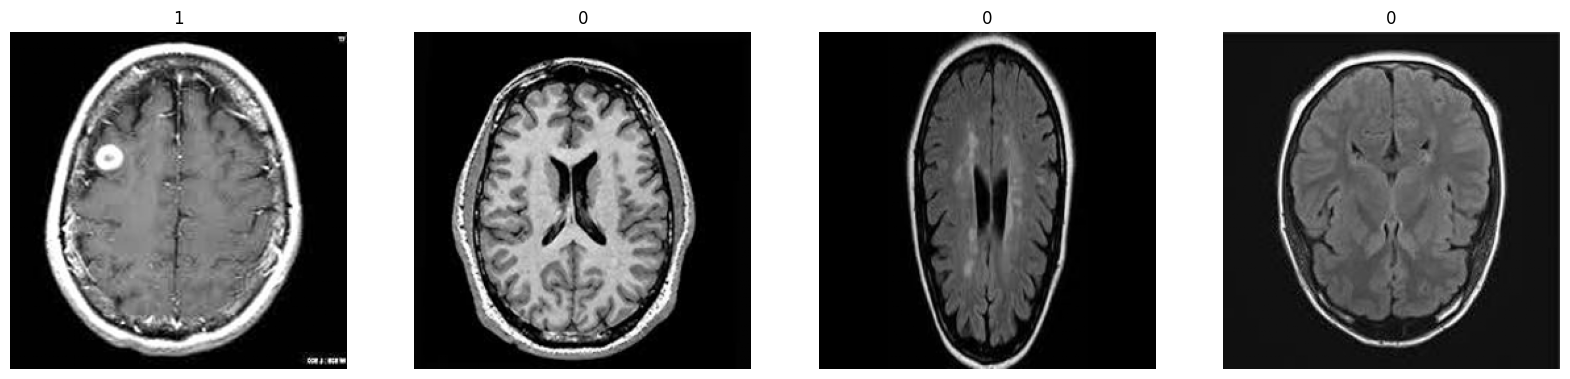

In [540]:
# Batch the dataset
batch_size = 4
buffer_size = len(images_array) #


# Visualize first batch
dataset = tf.data.Dataset.from_tensor_slices((images_array, labels_array))
dataset = dataset.shuffle(buffer_size).batch(batch_size)

dataset_iterator = iter(dataset)
# Fetch and visualize the first batch using next()
def show_next_batch(dataset_iterator):
    batch = next(dataset_iterator)  # Get the next batch
    fig, ax = plt.subplots(ncols=batch_size, figsize=(20,5))  # Adjust the figsize if needed
    idx = 0
    for img in batch[0][:4]:
        ax[idx].imshow(img)
        label = batch[1][idx].numpy()
        ax[idx].title.set_text(f"{int(label)}") 
        ax[idx].axis('off') # 1 for tumor, 0 for no tumor
        idx += 1
    plt.show()

# Call `show_next_batch()` to visualize the first batch
show_next_batch(dataset_iterator)


In [541]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images_array,labels_array,test_size=0.2,random_state=0)

In [542]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2400, 256, 256, 3)
(2400,)
(600, 256, 256, 3)
(600,)


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout

In [ ]:
model=Sequential()
model.add(Conv2D(32 ,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32 ,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64 ,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras.optimizers import Adam 
model.compile(optimizer = Adam(learning_rate=0.0001),loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [478]:
hist=model.fit(x_train,y_train,batch_size=20,verbose=1, validation_data=(x_test,y_test), epochs=10,shuffle=False)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.7712 - loss: 0.4845 - val_accuracy: 0.7350 - val_loss: 0.5236
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7732 - loss: 0.4886 - val_accuracy: 0.7400 - val_loss: 0.5202
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.7707 - loss: 0.4869 - val_accuracy: 0.7417 - val_loss: 0.5149
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.7788 - loss: 0.4786 - val_accuracy: 0.7450 - val_loss: 0.5095
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.7892 - loss: 0.4684 - val_accuracy: 0.7417 - val_loss: 0.5188
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.7918 - loss: 0.4730 - val_accuracy: 0.7517 - val_loss: 0.5090
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7877 - loss: 0.4702 - val_accuracy: 0.7467 - val_loss: 0.5033
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.7959 - loss: 0.4701 - val_accu

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [484]:
model.save(os.path.join('models','TumorDetModel.keras'))

In [486]:
from tensorflow.keras.models import load_model 
best_model = load_model(os.path.join('models','TumorDetModel.keras'))

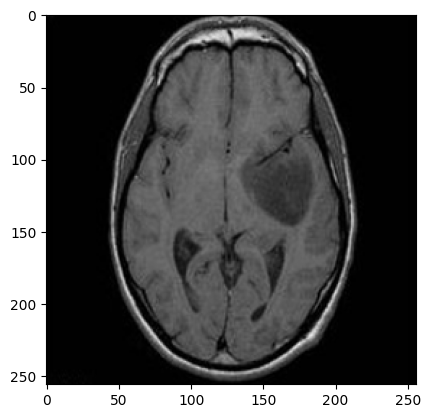

In [548]:
img_path = os.path.join('pred','pred24.jpg')
if img_path.split('.')[1] == 'jpg':
        image = cv2.imread(img_path)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((256, 256))
        image=np.array(image)
plt.imshow(image)
plt.show()

In [508]:
yhat = best_model.predict(np.expand_dims(image, 0))
predicted_label = np.argmax(yhat, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [510]:
print(f'Predicted Label: {predicted_label}')

Predicted Label: [0]


In [512]:
if predicted_label > 0.5: 
    print(f'person has tumor')
else:
    print(f'person is ok')

person is ok
